**Project Documentation: Exploratory Data Analysis (EDA)**
-------
**Objective:**
To perform a thorough Exploratory Data Analysis (EDA) by visualizing and understanding the distribution of the data. We'll start with a focus on the average and range of values for each categorical variable.

In [140]:
# Essential Libraries
import pandas as pd
import numpy as np

# Data Preprocessing and Transformation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd



In [141]:
# Load the data
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [142]:
train['date'] = pd.to_datetime(train['date'])
train['year'] = pd.to_datetime(train['date']).dt.year
train['month'] = pd.to_datetime(train['date']).dt.month
train['day'] = pd.to_datetime(train['date']).dt.day

In [143]:
df = train

In [144]:
df = df.drop(['id'], axis = 1)
df = df.dropna()

df.head(5)

,date,country,store,product,num_sold,year,month,day
1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,2010,1,1
2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,2010,1,1
3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,2010,1,1
4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,2010,1,1
5,2010-01-01,Canada,Stickers for Less,Holographic Goose,300.0,2010,1,1


**Step 1: Analyzing the Average and Range for Each Categorical Variable**
------
Goals:
<ol>
<li>Calculate the average values for numerical variables grouped by each category.</li>
<li>Visualize the distribution and range of values using boxplots.</li>
<li>Conduct ANOVA and Tukey Tests for Each Categorical Variable.</li>
</ol>

# Analysis of the Country Variable

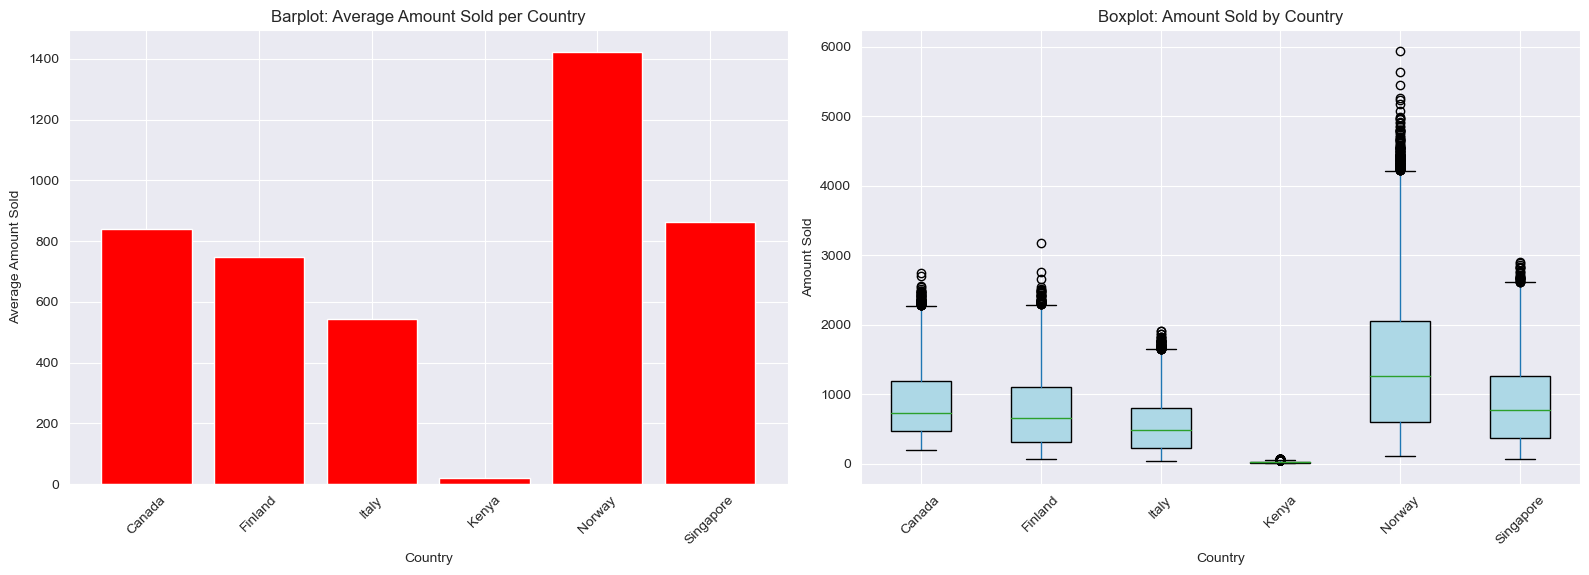

In [145]:
# Calculate mean num_sold for each country
country_means = df.groupby('country')['num_sold'].mean().reset_index()

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Barplot: Average amount sold for each country
axes[0].bar(country_means['country'], country_means['num_sold'], color='red')
axes[0].set_title("Barplot: Average Amount Sold per Country")
axes[0].set_xlabel("Country")
axes[0].set_ylabel("Average Amount Sold")
axes[0].tick_params(axis='x', rotation=45)

# Boxplot: Distribution of amount sold by country
df.boxplot(column='num_sold', by='country', ax=axes[1], patch_artist=True, boxprops=dict(facecolor='lightblue'))
axes[1].set_title("Boxplot: Amount Sold by Country")
axes[1].set_xlabel("Country")
axes[1].set_ylabel("Amount Sold")
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout and remove the default Pandas boxplot title
plt.suptitle("")
plt.tight_layout()
plt.show()


In [146]:
model_country = ols('num_sold ~ country', data = df).fit()
print(sm.stats.anova_lm(model_country, typ = 2))

                sum_sq        df             F  PR(>F)
country   3.772391e+10       5.0  24669.224785     0.0
Residual  6.766754e+10  221253.0           NaN     NaN


# ANOVA Test Results and Findings

The ANOVA test indicates that there is a statistically significant difference in the average amount_sold across countries. With a p-value of 0.0, we can confidently reject the null hypothesis, which states that the means are equal across all groups.  

In [147]:
tukey = pairwise_tukeyhsd(df['num_sold'], df['country'], alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1   group2   meandiff p-adj   lower     upper   reject
------------------------------------------------------------
 Canada   Finland  -91.8017   0.0 -103.5307  -80.0727   True
 Canada     Italy -297.8036   0.0 -309.5326 -286.0746   True
 Canada     Kenya -819.6139   0.0 -831.7155 -807.5123   True
 Canada    Norway  582.5154   0.0  570.7864  594.2444   True
 Canada Singapore   23.0074   0.0   11.2784   34.7364   True
Finland     Italy -206.0019   0.0 -217.3821 -194.6217   True
Finland     Kenya -727.8122   0.0  -739.576 -716.0484   True
Finland    Norway  674.3171   0.0  662.9369  685.6973   True
Finland Singapore  114.8091   0.0  103.4289  126.1893   True
  Italy     Kenya -521.8103   0.0 -533.5741 -510.0465   True
  Italy    Norway   880.319   0.0  868.9388  891.6992   True
  Italy Singapore   320.811   0.0  309.4308  332.1912   True
  Kenya    Norway 1402.1293   0.0 1390.3655 1413.8932   True
  Kenya Singapore  842.6

# Tukey HSD Test Results: Pairwise Comparisons Between Countries

The Tukey HSD test was conducted to identify significant differences in `amount_sold` between countries. Below are the results:

## Key Findings:

### Significance:
- All pairwise comparisons have a p-value of \( p < 0.05 \), indicating statistically significant differences in mean `amount_sold` between all country pairs.

### Effect Sizes:
- The largest difference was observed between **Kenya** and **Norway** at 1402.13.
- The smallest difference was between **Canada** and **Singapore** at 23.01.


# Analysis of Product Variable

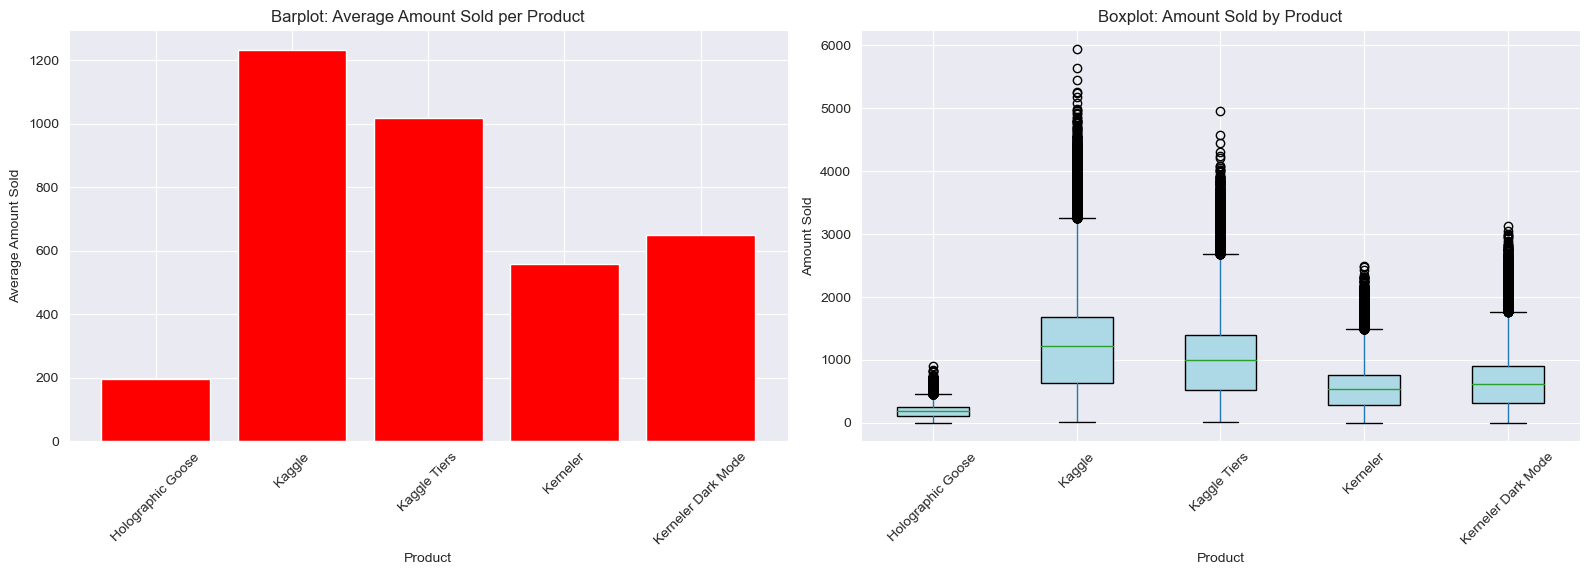

In [148]:
# Calculate mean num_sold for each product
product_means = df.groupby('product')['num_sold'].mean().reset_index()

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Barplot: Average amount sold for each product
axes[0].bar(product_means['product'], product_means['num_sold'], color='red')
axes[0].set_title("Barplot: Average Amount Sold per Product")
axes[0].set_xlabel("Product")
axes[0].set_ylabel("Average Amount Sold")
axes[0].tick_params(axis='x', rotation=45)

# Boxplot: Distribution of amount sold by product
df.boxplot(column='num_sold', by='product', ax=axes[1], patch_artist=True, boxprops=dict(facecolor='lightblue'))
axes[1].set_title("Boxplot: Amount Sold by Product")
axes[1].set_xlabel("Product")
axes[1].set_ylabel("Amount Sold")
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout and remove the default Pandas boxplot title
plt.suptitle("")
plt.tight_layout()
plt.show()



In [149]:
model_product = ols('num_sold ~ product', data = df).fit()
print(sm.stats.anova_lm(model_product, typ = 2))

                sum_sq        df             F  PR(>F)
product   2.754944e+10       4.0  19576.262467     0.0
Residual  7.784202e+10  221254.0           NaN     NaN


# ANOVA Test Results and Findings

The ANOVA test indicates that there is a statistically significant difference in the average amount_sold across different product types. With a p-value of 0.0, we can confidently reject the null hypothesis, which states that the means are equal across all groups. 

In [150]:
tukey = pairwise_tukeyhsd(df['num_sold'], df['product'], alpha=0.05)
print(tukey)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
      group1            group2        meandiff p-adj   lower     upper   reject
-------------------------------------------------------------------------------
Holographic Goose             Kaggle 1034.9002   0.0 1023.6215  1046.179   True
Holographic Goose       Kaggle Tiers  820.8597   0.0   809.581  832.1385   True
Holographic Goose           Kerneler  359.4287   0.0  348.1465   370.711   True
Holographic Goose Kerneler Dark Mode  453.5577   0.0  442.2788  464.8365   True
           Kaggle       Kaggle Tiers -214.0405   0.0  -224.706 -203.3749   True
           Kaggle           Kerneler -675.4715   0.0 -686.1407 -664.8022   True
           Kaggle Kerneler Dark Mode -581.3426   0.0 -592.0082  -570.677   True
     Kaggle Tiers           Kerneler  -461.431   0.0 -472.1003 -450.7617   True
     Kaggle Tiers Kerneler Dark Mode -367.3021   0.0 -377.9677 -356.6365   True
         Kerneler Kerneler Dark Mode   9

# Tukey HSD Test Results: Pairwise Comparisons Between Product Types

The Tukey HSD test was conducted to identify significant differences in `amount_sold` between product types. Below are the results:

## Key Findings:

### Significance:
- All pairwise comparisons have a p-value of \( p < 0.05 \), indicating statistically significant differences in mean `amount_sold` between all product pairs.

### Effect Sizes:
- The largest difference was observed between **Holographic Goose** and **Kaggle** 1034.90.
- The smallest difference was observed between **Kerneler** and **Kerneler Dark Mode** at 94.13.

# Analysis of interaction term country*product

In [151]:
model_interaction = ols('num_sold ~ product*country', data = df).fit()
print(sm.stats.anova_lm(model_interaction, typ = 2))

                       sum_sq        df             F  PR(>F)
product          3.120117e+10       4.0  62135.315116     0.0
country          4.137565e+10       5.0  65917.753270     0.0
product:country  8.693902e+09      20.0   3462.679713     0.0
Residual         2.777247e+10  221229.0           NaN     NaN


In [152]:
df['product_country'] = df['product'] + "_" + df['country']

# Perform Tukey HSD for the interaction variable
tukey_interaction = pairwise_tukeyhsd(df['num_sold'], df['product_country'], alpha=0.05)

# Print Tukey HSD results
print(tukey_interaction)

                          Multiple Comparison of Means - Tukey HSD, FWER=0.05                           
           group1                       group2             meandiff  p-adj    lower      upper    reject
--------------------------------------------------------------------------------------------------------
    Holographic Goose_Canada    Holographic Goose_Finland   -63.8433    0.0   -91.1354   -36.5513   True
    Holographic Goose_Canada      Holographic Goose_Italy  -112.8334    0.0  -140.1254   -85.5414   True
    Holographic Goose_Canada      Holographic Goose_Kenya  -235.4891    0.0  -268.3845  -202.5938   True
    Holographic Goose_Canada     Holographic Goose_Norway    96.3299    0.0    69.0379    123.622   True
    Holographic Goose_Canada  Holographic Goose_Singapore   -36.5295 0.0002   -63.8216    -9.2375   True
    Holographic Goose_Canada          Kaggle Tiers_Canada   828.3838    0.0   801.0917   855.6758   True
    Holographic Goose_Canada         Kaggle Tiers_Finla

# Analysis of Interaction Term

## Summary
The interaction analysis reveals significant differences between `product` and `country` combinations in terms of the number of items sold. This indicates that spending habits and product preferences vary significantly across different countries, warranting further investigation.

---

## ANOVA Results
The ANOVA table for the interaction term (`product:country`) confirms that both the main effects and the interaction effect are highly significant.

### Key Takeaways:
1. **Main Effects**:
   - Both `product` and `country` have statistically significant effects on the number of items sold.
2. **Interaction**:
   - The significant interaction effect (\(p = 0.0\)) indicates that the relationship between `product` and `num_sold` depends on the country.


# Further analysis of Products Sold Across Countries 

In [153]:
df['country'].unique()

array(['Canada', 'Finland', 'Italy', 'Kenya', 'Norway', 'Singapore'],
      dtype=object)

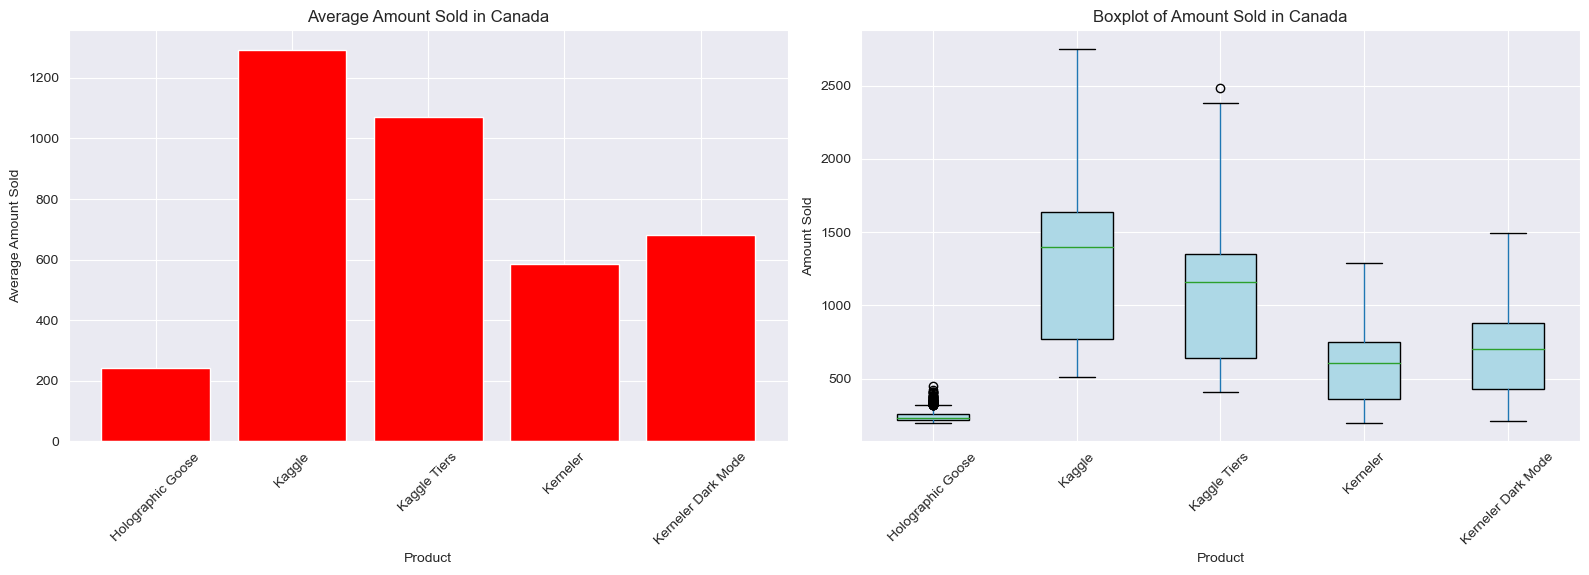

ANOVA Results for Canada:
                sum_sq       df            F  PR(>F)
product   3.897104e+09      4.0  9135.668489     0.0
Residual  3.637031e+09  34104.0          NaN     NaN


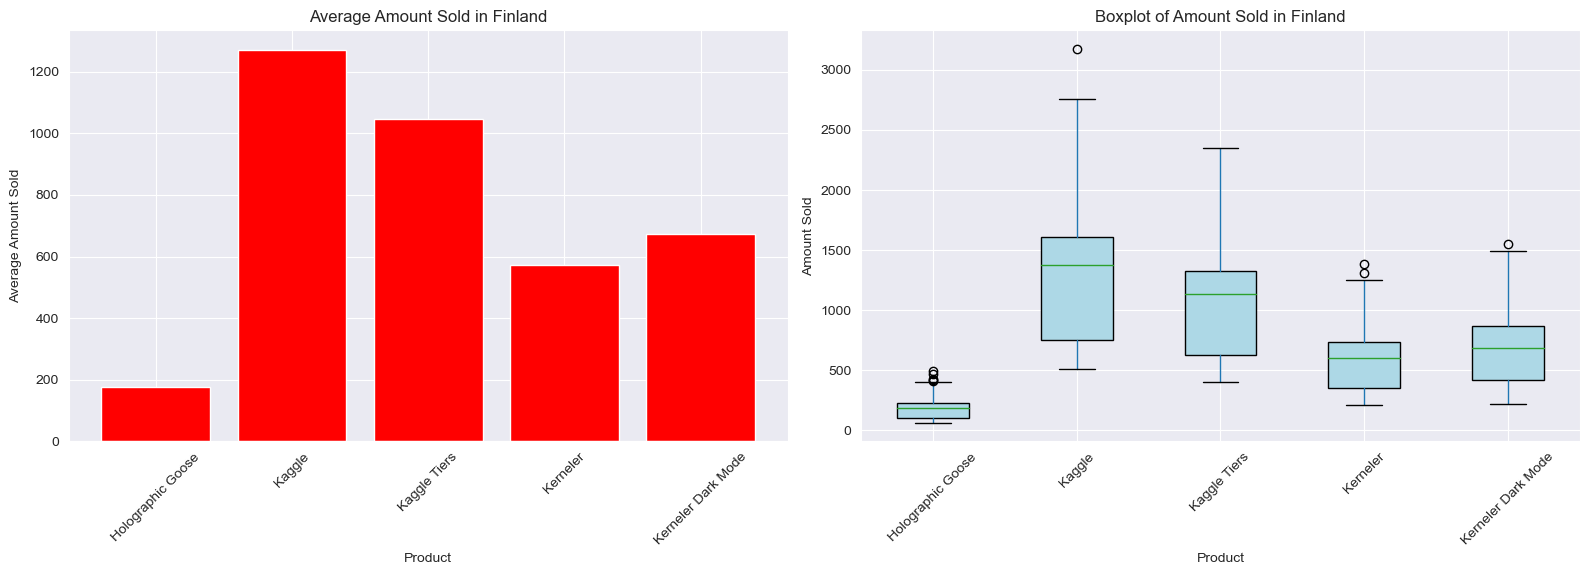

ANOVA Results for Finland:
                sum_sq       df             F  PR(>F)
product   5.566246e+09      4.0  15210.504038     0.0
Residual  3.508522e+09  38350.0           NaN     NaN


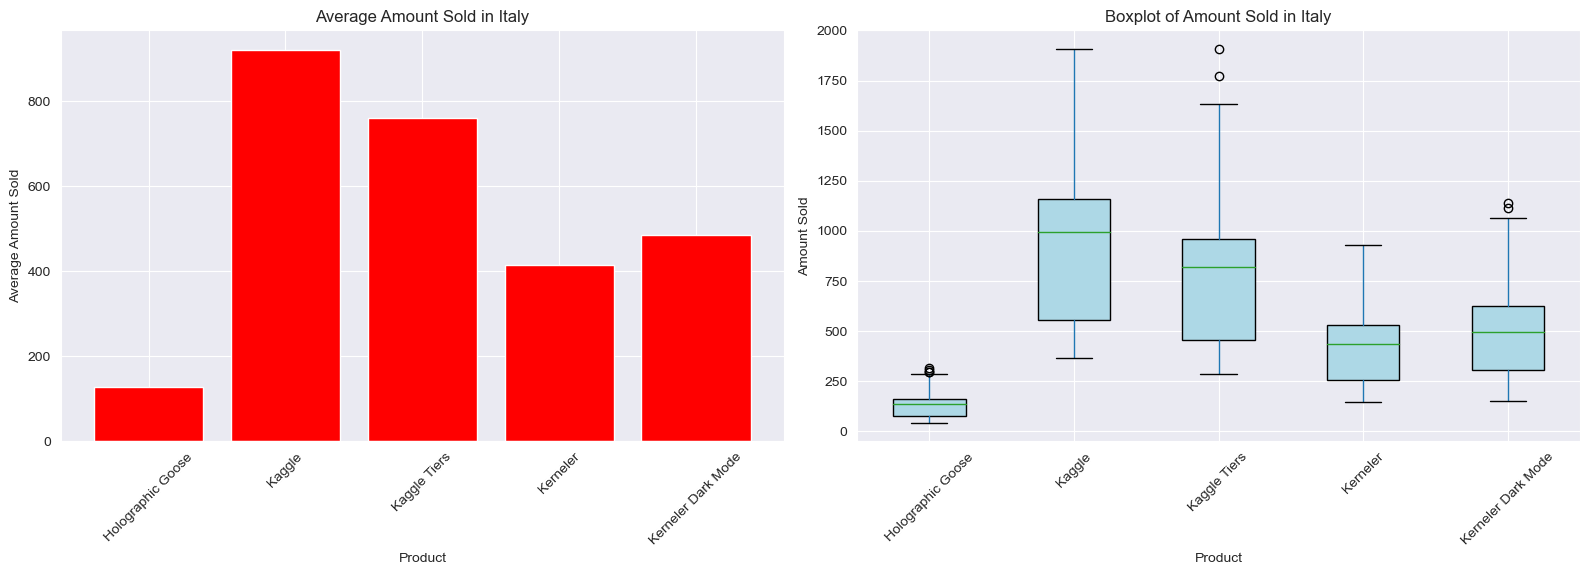

ANOVA Results for Italy:
                sum_sq       df             F  PR(>F)
product   2.925270e+09      4.0  15079.563707     0.0
Residual  1.859870e+09  38350.0           NaN     NaN


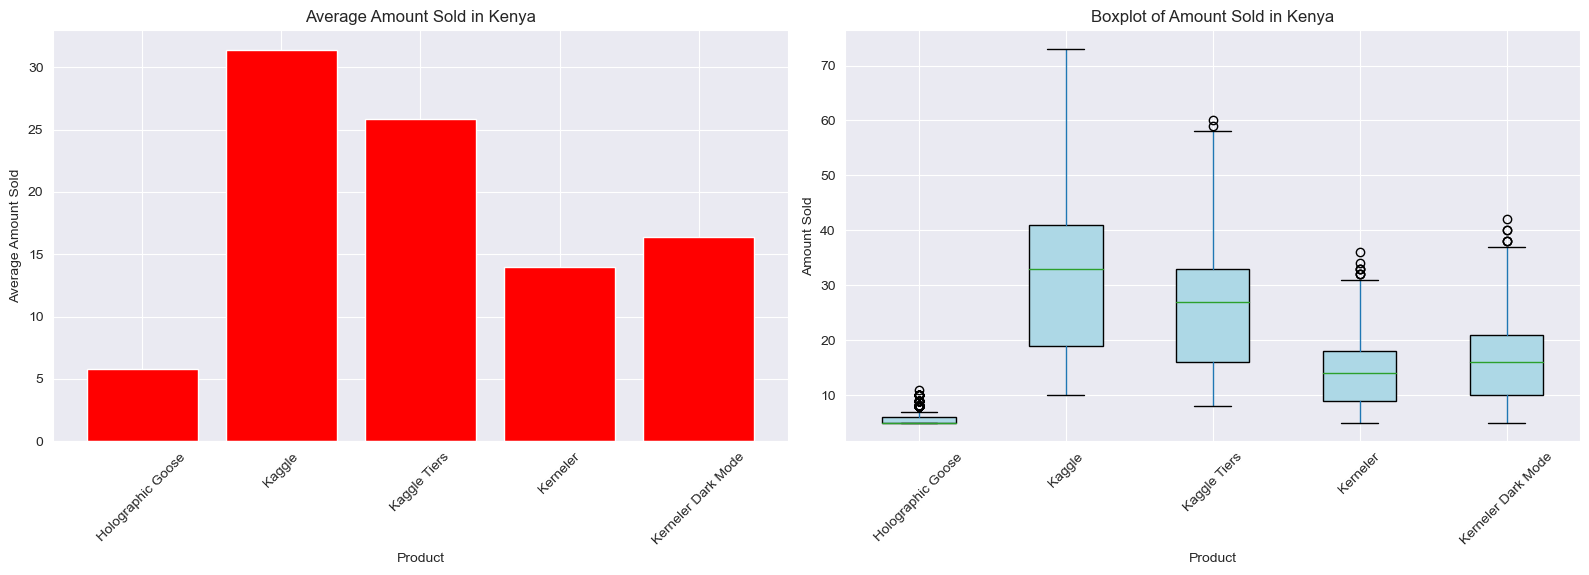

ANOVA Results for Kenya:
                sum_sq       df            F  PR(>F)
product   2.260203e+06      4.0  7509.563653     0.0
Residual  2.537609e+06  33725.0          NaN     NaN


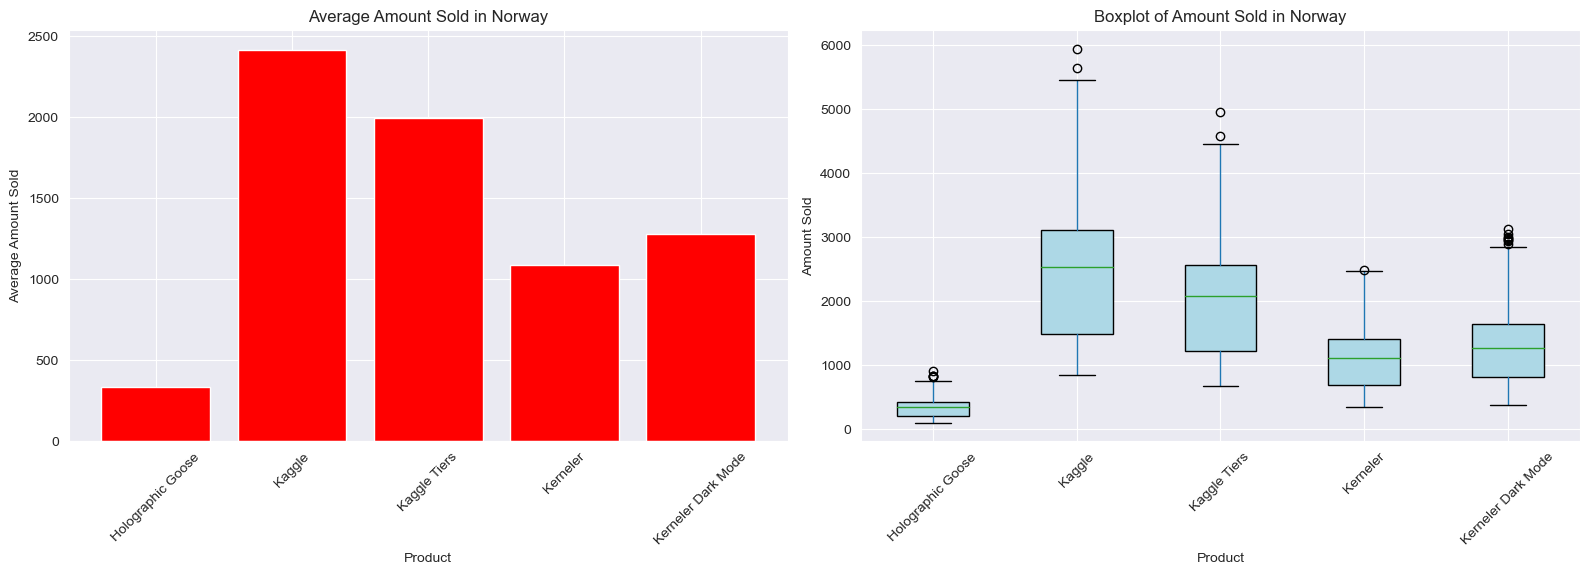

ANOVA Results for Norway:
                sum_sq       df             F  PR(>F)
product   2.009811e+10      4.0  13661.083976     0.0
Residual  1.410507e+10  38350.0           NaN     NaN


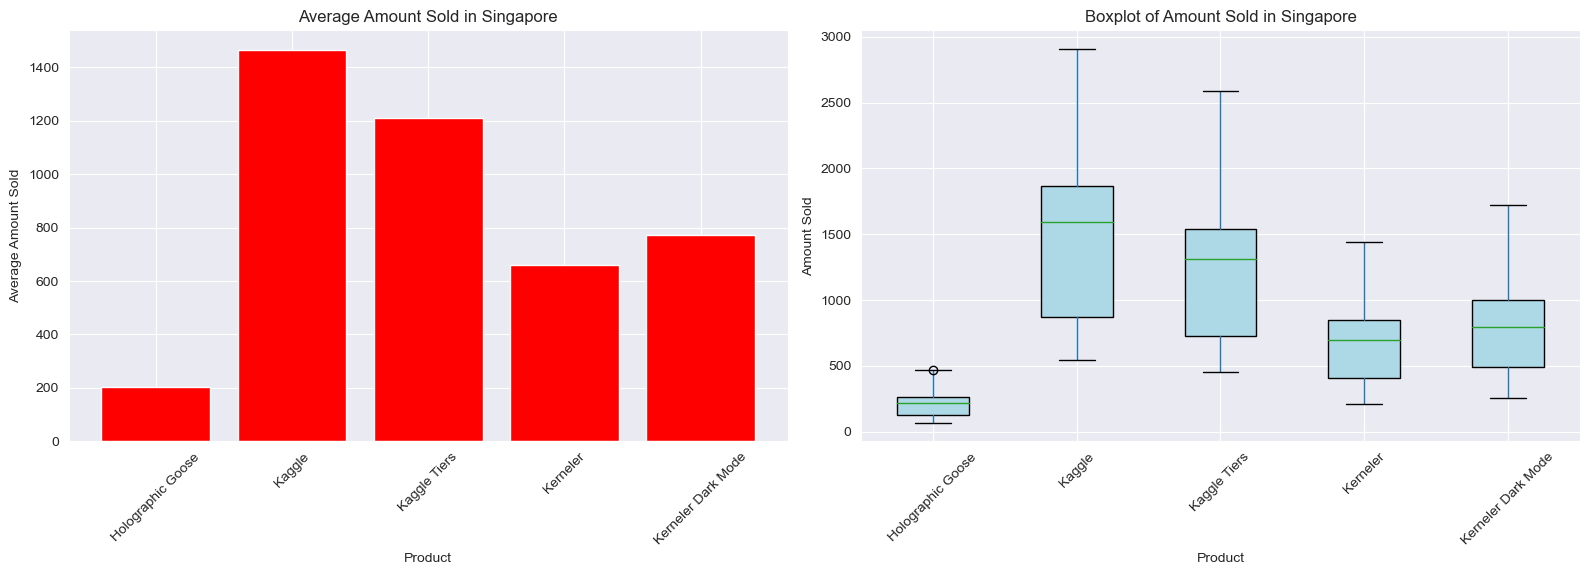

ANOVA Results for Singapore:
                sum_sq       df             F  PR(>F)
product   7.406086e+09      4.0  15239.160734     0.0
Residual  4.659433e+09  38350.0           NaN     NaN


In [154]:
# List of countries
countries = ['Canada', 'Finland', 'Italy', 'Kenya', 'Norway', 'Singapore']

# Loop through each country and generate barplot and boxplot side by side
for country in countries:
    # Filter data for the specific country
    country_df = df[df['country'] == country]
    
    # Calculate mean num_sold for each product
    country_product_means = country_df.groupby('product')['num_sold'].mean().reset_index()
    
    # Create side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Barplot: Average amount sold for each product
    axes[0].bar(country_product_means['product'], country_product_means['num_sold'], color='red')
    axes[0].set_title(f"Average Amount Sold in {country}")
    axes[0].set_xlabel("Product")
    axes[0].set_ylabel("Average Amount Sold")
    axes[0].tick_params(axis='x', rotation=45)
    
    # Boxplot: Distribution of amount sold for each product
    country_df.boxplot(column='num_sold', by='product', ax=axes[1], patch_artist=True, boxprops=dict(facecolor='lightblue'))
    axes[1].set_title(f"Boxplot of Amount Sold in {country}")
    axes[1].set_xlabel("Product")
    axes[1].set_ylabel("Amount Sold")
    axes[1].tick_params(axis='x', rotation=45)
    plt.suptitle("")  # Remove default Pandas boxplot title
    
    plt.tight_layout()
    plt.show()
    
    # ANOVA Analysis
    model_product_country = ols('num_sold ~ product', data=country_df).fit()
    print(f"ANOVA Results for {country}:")
    print(sm.stats.anova_lm(model_product_country, typ=2))
    print('\n')


# Key Findings for Categorical Variables

This analysis confirms a significant interaction between `product` and `country`. As such, a `country*product` parameter should be added to the dataframe to capture the variation in the amount of each product sold across countries. 

This finding aligns with expectations, as countries with differing climates, cultural preferences, and fashion tastes are likely to value products differently.

This concludes the EDA of the categorical Variable


# Time Series EDA

In [155]:
df

,date,country,store,product,num_sold,year,month,day,product_country
1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,2010,1,1,Kaggle_Canada
2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,2010,1,1,Kaggle Tiers_Canada
3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,2010,1,1,Kerneler_Canada
4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,2010,1,1,Kerneler Dark Mode_Canada
5,2010-01-01,Canada,Stickers for Less,Holographic Goose,300.0,2010,1,1,Holographic Goose_Canada
...,...,...,...,...,...,...,...,...,...
230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0,2016,12,31,Holographic Goose_Singapore
230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0,2016,12,31,Kaggle_Singapore
230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0,2016,12,31,Kaggle Tiers_Singapore
230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0,2016,12,31,Kerneler_Singapore


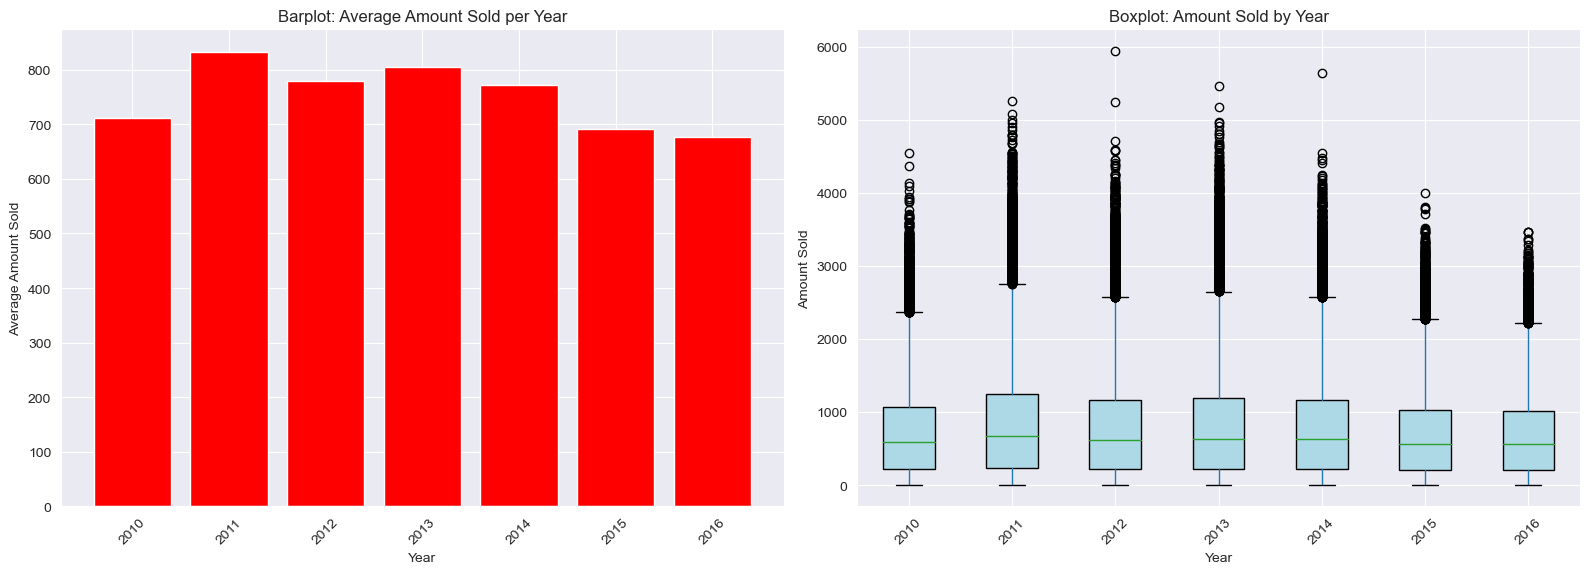

                sum_sq        df           F        PR(>F)
year      1.725425e+08       1.0  362.826672  7.924551e-81
Residual  1.052189e+11  221257.0         NaN           NaN


In [156]:
# Calculate mean num_sold for each year
year_means = df.groupby('year')['num_sold'].mean().reset_index()

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Barplot: Average amount sold for each year
axes[0].bar(year_means['year'], year_means['num_sold'], color='red')
axes[0].set_title("Barplot: Average Amount Sold per Year")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Average Amount Sold")
axes[0].tick_params(axis='x', rotation=45)

# Boxplot: Distribution of amount sold by year
df.boxplot(column='num_sold', by='year', ax=axes[1], patch_artist=True, boxprops=dict(facecolor='lightblue'))
axes[1].set_title("Boxplot: Amount Sold by Year")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Amount Sold")
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout and remove the default Pandas boxplot title
plt.suptitle("")
plt.tight_layout()
plt.show()

#Anova test for year
model_year = ols('num_sold ~ year', data=df).fit()
print(sm.stats.anova_lm(model_year, typ=2))

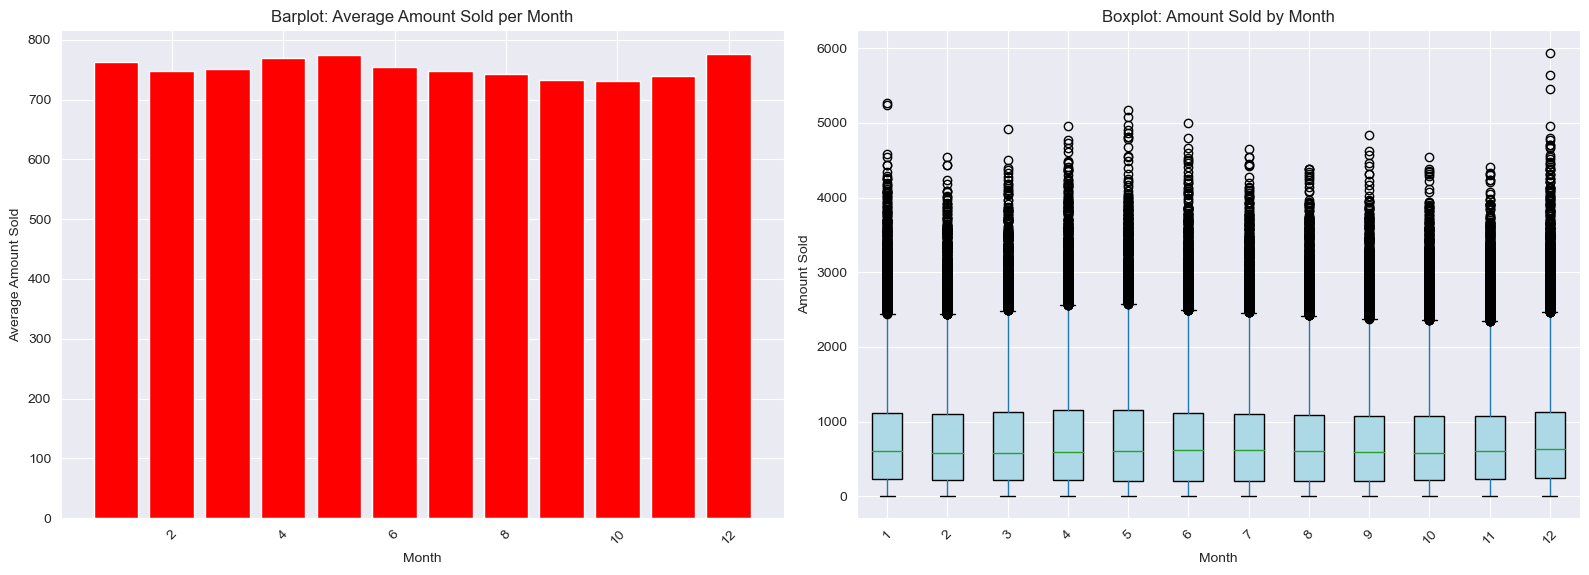

                sum_sq        df         F   PR(>F)
month     4.122940e+06       1.0  8.655967  0.00326
Residual  1.053873e+11  221257.0       NaN      NaN


In [157]:
# Calculate mean num_sold for each year
monthly_means = df.groupby('month')['num_sold'].mean().reset_index()

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Barplot: Average amount sold for each year
axes[0].bar(monthly_means['month'], monthly_means['num_sold'], color='red')
axes[0].set_title("Barplot: Average Amount Sold per Month")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Average Amount Sold")
axes[0].tick_params(axis='x', rotation=45)

# Boxplot: Distribution of amount sold by year
df.boxplot(column='num_sold', by='month', ax=axes[1], patch_artist=True, boxprops=dict(facecolor='lightblue'))
axes[1].set_title("Boxplot: Amount Sold by Month")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Amount Sold")
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout and remove the default Pandas boxplot title
plt.suptitle("")
plt.tight_layout()
plt.show()

#Anova test for month
model_month = ols('num_sold ~ month', data=df).fit()
print(sm.stats.anova_lm(model_month, typ=2))

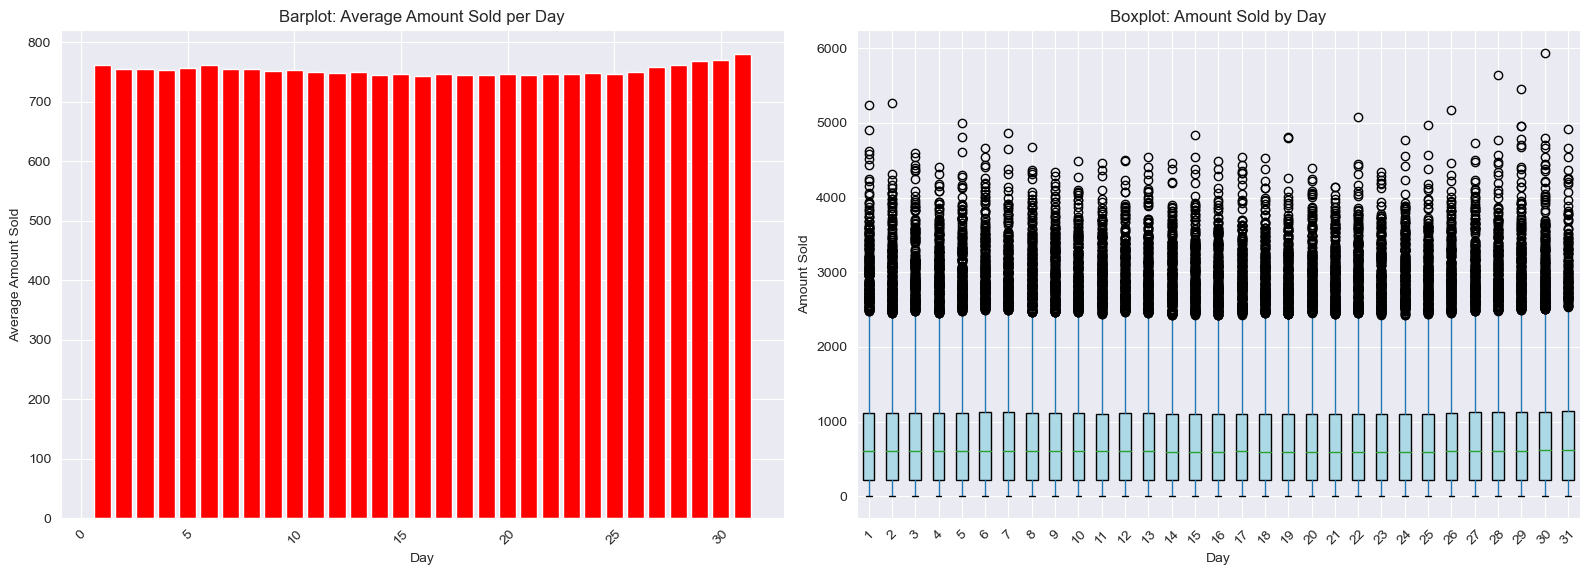

                sum_sq        df         F    PR(>F)
day       1.361473e+05       1.0  0.285826  0.592909
Residual  1.053913e+11  221257.0       NaN       NaN


In [158]:
# Calculate mean num_sold for each day
day_means = df.groupby('day')['num_sold'].mean().reset_index()

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Barplot: Average amount sold for each day
axes[0].bar(day_means['day'], day_means['num_sold'], color='red')
axes[0].set_title("Barplot: Average Amount Sold per Day")
axes[0].set_xlabel("Day")
axes[0].set_ylabel("Average Amount Sold")
axes[0].tick_params(axis='x', rotation=45)

# Boxplot: Distribution of amount sold by day
df.boxplot(column='num_sold', by='day', ax=axes[1], patch_artist=True, boxprops=dict(facecolor='lightblue'))
axes[1].set_title("Boxplot: Amount Sold by Day")
axes[1].set_xlabel("Day")
axes[1].set_ylabel("Amount Sold")
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout and remove the default Pandas boxplot title
plt.suptitle("")
plt.tight_layout()
plt.show()

#Anova test for day
model_day = ols('num_sold ~ day', data=df).fit()
print(sm.stats.anova_lm(model_day, typ=2))

# Initial Analysis

As seen above, there isn't much to be gained from each the bar charts.  Across the years, and months, and days there does not appear to be much change. As such further analysis of seasonality needs to be conducted.  What is interesting to note is that the day parameter appears to be insignificant.   

In [159]:
# Ensure the DataFrame is sorted by product and the temporal index
df_products_sorted = df.sort_values(by=['product_country', 'date'])

# Calculate rolling means for each product
df_products_sorted['rolling_mean_products'] = df.groupby('product_country')['num_sold'].rolling(window=30, min_periods=1).mean().reset_index(level=0, drop=True)

# Display the updated DataFrame
df_products_sorted

,date,country,store,product,num_sold,year,month,day,product_country,rolling_mean_products
5,2010-01-01,Canada,Stickers for Less,Holographic Goose,300.0,2010,1,1,Holographic Goose_Canada,300.000000
10,2010-01-01,Canada,Premium Sticker Mart,Holographic Goose,375.0,2010,1,1,Holographic Goose_Canada,337.500000
95,2010-01-02,Canada,Stickers for Less,Holographic Goose,281.0,2010,1,2,Holographic Goose_Canada,318.666667
100,2010-01-02,Canada,Premium Sticker Mart,Holographic Goose,336.0,2010,1,2,Holographic Goose_Canada,323.000000
185,2010-01-03,Canada,Stickers for Less,Holographic Goose,297.0,2010,1,3,Holographic Goose_Canada,317.800000
...,...,...,...,...,...,...,...,...,...,...
230033,2016-12-30,Singapore,Stickers for Less,Kerneler,1094.0,2016,12,30,Kerneler_Singapore,773.933333
230038,2016-12-30,Singapore,Premium Sticker Mart,Kerneler,1253.0,2016,12,30,Kerneler_Singapore,786.566667
230118,2016-12-31,Singapore,Discount Stickers,Kerneler,556.0,2016,12,31,Kerneler_Singapore,791.866667
230123,2016-12-31,Singapore,Stickers for Less,Kerneler,1052.0,2016,12,31,Kerneler_Singapore,802.566667
